In [27]:
#Libraries

import copy 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from scipy.stats import chisquare
from sklearn.preprocessing import StandardScaler

In [2]:
# Read Dataset
dataset = pd.read_csv('wine.csv',delimiter=',',header=0)
dataset


,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
# Header
header = []
for row in dataset:
    header.append(row)
header

['Wine',
 'Alcohol',
 'Malic.acid',
 'Ash',
 'Acl',
 'Mg',
 'Phenols',
 'Flavanoids',
 'Nonflavanoid.phenols',
 'Proanth',
 'Color.int',
 'Hue',
 'OD',
 'Proline']

In [4]:
print(dataset.describe()) #Descripción de los datos


             Wine     Alcohol  Malic.acid         Ash         Acl          Mg  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     1.938202   13.000618    2.336348    2.366517   19.494944   99.741573   
std      0.775035    0.811827    1.117146    0.274344    3.339564   14.282484   
min      1.000000   11.030000    0.740000    1.360000   10.600000   70.000000   
25%      1.000000   12.362500    1.602500    2.210000   17.200000   88.000000   
50%      2.000000   13.050000    1.865000    2.360000   19.500000   98.000000   
75%      3.000000   13.677500    3.082500    2.557500   21.500000  107.000000   
max      3.000000   14.830000    5.800000    3.230000   30.000000  162.000000   

          Phenols  Flavanoids  Nonflavanoid.phenols     Proanth   Color.int  \
count  178.000000  178.000000            178.000000  178.000000  178.000000   
mean     2.295112    2.029270              0.361854    1.590899    5.058090   
std      0.625851    0.998859    

In [5]:
correlation=dataset.corr() #Correlation Matrix
correlation

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
Wine,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic.acid,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Acl,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Mg,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid.phenols,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanth,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


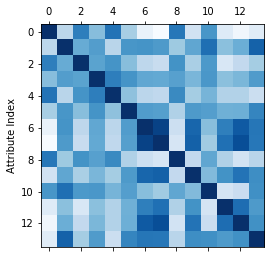

In [6]:
# Display the correlation matrix with a specified figure number and a bluescale
# colormap
plt.figure()
plt.matshow(correlation, fignum=1, cmap=plt.cm.Blues)
plt.ylabel("Attribute Index")
plt.show()

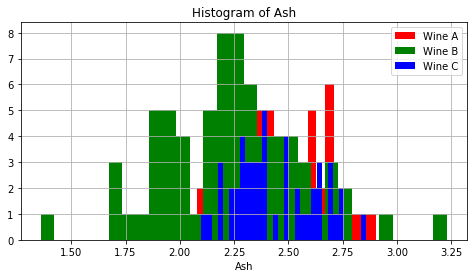

In [22]:
### Histogram of Alcohol variable

plt.figure(figsize=(8,4))
plt.hist(dataset[dataset.Wine==1].Ash, 30, facecolor='r')
plt.hist(dataset[dataset.Wine==2].Ash, 30, facecolor='g')
plt.hist(dataset[dataset.Wine==3].Ash, 30, facecolor='b')
plt.title('Histogram of Ash')
plt.legend(['Wine A','Wine B','Wine C'])
plt.xlabel("Ash")
plt.grid(True)
plt.show()


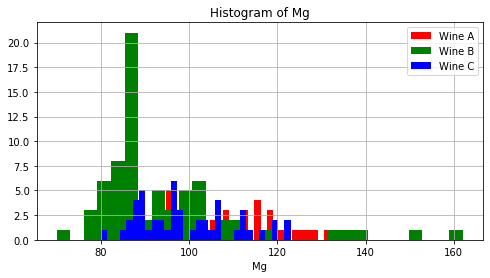

In [23]:
### Histogram of Alcohol variable

plt.figure(figsize=(8,4))
plt.hist(dataset[dataset.Wine==1].Mg, 30, facecolor='r')
plt.hist(dataset[dataset.Wine==2].Mg, 30, facecolor='g')
plt.hist(dataset[dataset.Wine==3].Mg, 30, facecolor='b')
plt.title('Histogram of Mg')
plt.legend(['Wine A','Wine B','Wine C'])
plt.xlabel("Mg")
plt.grid(True)
plt.show()


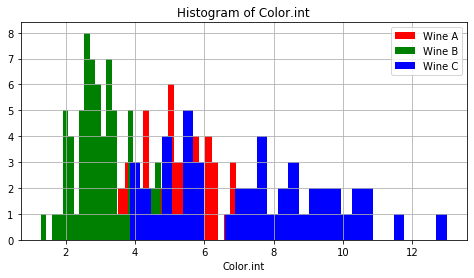

In [24]:
### Histogram of Alcohol variable

plt.figure(figsize=(8,4))
plt.hist(dataset[dataset.Wine==1]['Color.int'], 30, facecolor='r')
plt.hist(dataset[dataset.Wine==2]['Color.int'], 30, facecolor='g')
plt.hist(dataset[dataset.Wine==3]['Color.int'], 30, facecolor='b')
plt.title('Histogram of Color.int')
plt.legend(['Wine A','Wine B','Wine C'])
plt.xlabel("Color.int")
plt.grid(True)
plt.show()


In [82]:
flag = 'nonorm'

x = copy.deepcopy(dataset)
x.drop('Wine', axis=1, inplace=True)

x_std = StandardScaler().fit_transform(x)
x_std

if (flag != 'norm'):
    x_std = x

In [83]:
cor_mat = np.corrcoef(x_std.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.1443294  -0.48365155  0.20738262 -0.0178563   0.26566365 -0.21353865
  -0.05639636  0.01496997 -0.39613926  0.26628645  0.50861912 -0.22591696
   0.21160473]
 [ 0.24518758 -0.22493093 -0.08901289  0.53689028 -0.03521363 -0.53681385
   0.42052391  0.02596375 -0.06582674 -0.12169604 -0.07528304  0.07648554
  -0.30907994]
 [ 0.00205106 -0.31606881 -0.6262239  -0.21417556  0.14302547 -0.15447466
  -0.14917061 -0.14121803  0.17026002  0.04962237 -0.30769445 -0.49869142
  -0.02712539]
 [ 0.23932041  0.0105905  -0.61208035  0.06085941 -0.06610294  0.10082451
  -0.28696914  0.09168285 -0.42797018  0.05574287  0.20044931  0.47931378
   0.05279942]
 [-0.14199204 -0.299634   -0.13075693 -0.35179658 -0.72704851 -0.03814394
   0.3228833   0.05677422  0.15636143 -0.06222011  0.27140257  0.07128891
   0.06787022]
 [-0.39466085 -0.06503951 -0.14617896  0.19806835  0.14931841  0.0841223
  -0.02792498 -0.46390791  0.40593409  0.30388245  0.28603452  0.30434119
  -0.32013135]
 [-0.4229

4.705850252990425
2.4969737334111595
1.4460719697124993
0.918973923752823
0.8532281783543174
0.6416570314989336
0.5510283119410321
0.34849736328925224
0.2888799426226623
0.25090248221273015
0.22578863969868906
0.16877023482854772
0.1033779356869291


<BarContainer object of 13 artists>

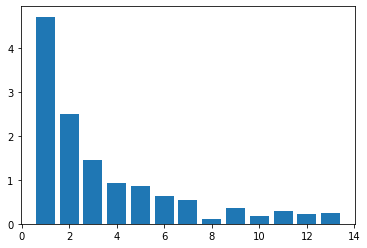

In [84]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

eig_pairs.sort(reverse=True)

# each eig_value will represent a portion of the data

for i in eig_pairs:
    print(i[0])

eig_x = np.linspace(1, len(eig_vals), len(eig_vals))
    
plt.bar(eig_x, eig_vals)

In [85]:
tot = sum(eig_vals)
# by calculating the percentage that each eig_value represents from the total, we can tell how much of the variance
# will be represented by each component
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)] 
cum_var_exp = np.cumsum(var_exp)

pc_n = 0

for i in cum_var_exp:
    pc_n = pc_n + 1
    if i > 90:
        print("We need", pc_n, "components to express 90% of the data.")
        break

We need 8 components to express 90% of the data.


In [86]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(len(eig_vals),1), 
                      eig_pairs[1][1].reshape(len(eig_vals),1)))

matrix_w

array([[-0.1443294 , -0.48365155],
       [ 0.24518758, -0.22493093],
       [ 0.00205106, -0.31606881],
       [ 0.23932041,  0.0105905 ],
       [-0.14199204, -0.299634  ],
       [-0.39466085, -0.06503951],
       [-0.4229343 ,  0.00335981],
       [ 0.2985331 , -0.02877949],
       [-0.31342949, -0.03930172],
       [ 0.0886167 , -0.52999567],
       [-0.29671456,  0.27923515],
       [-0.37616741,  0.16449619],
       [-0.28675223, -0.36490283]])

In [91]:
y = np.asarray(x_std.dot(matrix_w))
y

array([[-325.63701986, -436.86869785],
       [-317.81207811, -422.14349242],
       [-355.26773962, -472.70710859],
       [-442.4774388 , -585.57334645],
       [-227.4869049 , -313.00425709],
       [-433.69479743, -573.64919644],
       [-385.42847241, -509.63897558],
       [-389.41050379, -518.73748152],
       [-315.64379834, -420.71085026],
       [-315.42468004, -421.46554071],
       [-449.40045568, -592.76407305],
       [-381.45712109, -505.32177478],
       [-392.48651969, -518.37990957],
       [-346.11360999, -457.43851034],
       [-461.33208556, -606.54151358],
       [-392.48992141, -522.53164106],
       [-384.59996754, -513.83744584],
       [-340.9175294 , -457.47567748],
       [-498.88994077, -657.31435361],
       [-260.25579998, -353.16065558],
       [-243.68310072, -332.44979724],
       [-235.50738593, -321.03880198],
       [-312.86938576, -416.83713457],
       [-305.44175955, -407.42399285],
       [-256.64616685, -345.81085354],
       [-254.85728241, -3

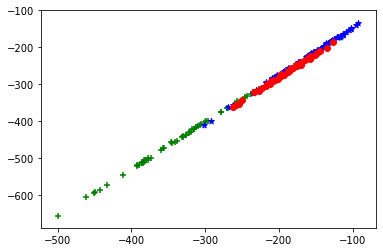

In [92]:
for i in range(0, len(dataset.Wine)):
    class_ = dataset.Wine[i]
    if class_ == 1:
        c1 = plt.scatter(y[i][0], y[i][1], c='g', marker='+')
    elif class_ == 2:
        c2 = plt.scatter(y[i][0], y[i][1], c='b', marker='*')
    else:
        c3 = plt.scatter(y[i][0], y[i][1], c='r', marker='o')

plt.show()